In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Random Data

(2000, 50)
(2000,)


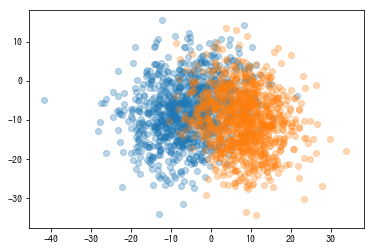

(50, 50)


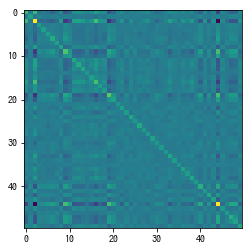

In [40]:
np.random.seed(0)

N = 1000
d = 50
X_1 = np.random.normal(1, 1, (N, d))  # generate random data with normal distribution
X_1 = np.random.normal(0, 1, (d, d)) @ X_1.T  # random transform
X_2 = np.random.normal(1, 1, (N, d))  # generate random data with normal distribution
X_2 = np.random.normal(0, 1, (d, d)) @ X_2.T  # random transform

X = np.c_[X_1, X_2].T
print(X.shape)

y = np.r_[np.ones(N), np.zeros(N)]  # labels: true is 1, false is 0.
print(y.shape)

plt.scatter(X[:N, 0], X[:N, 1], alpha=0.3)
plt.scatter(X[N:, 0], X[N:, 1], alpha=0.3)
plt.show()

# cov = np.cov(X, rowvar=False)
mu = np.mean(X, axis=0)
cov = (X - mu).T @ (X - mu) / N
print(cov.shape)
plt.imshow(cov)
plt.show()

## PCA(Principal Component Analysis)

(50, 50)
Cumulative contribution rate to 20rd component:  0.781377724855398


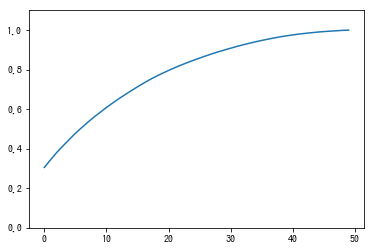

In [41]:
eig_vals, eig_vecs = np.linalg.eig(cov)
print(eig_vecs.shape)

ind = np.argsort(eig_vals)[::-1]
# eig_vals = eig_vals[ind]
# eig_vecs = eig_vecs[ind]

nrd = 20

print(f"Cumulative contribution rate to {nrd}rd component: ", np.sum((eig_vals[ind]/np.sum(eig_vals))[:nrd]))
plt.plot(np.arange(len(eig_vals)), np.cumsum(eig_vals[ind]/np.sum(eig_vals)))
plt.ylim([0, 1.1])
plt.show()

In [42]:
L = np.diag(eig_vals)
D = L.T @ cov @ L

print(np.diag(D))
print(eig_vals)

[8.64470403e+08 7.89184048e+06 2.92377142e+07 5.32031118e+06
 5.32779979e+06 5.22121220e+06 5.63400969e+06 4.17153889e+06
 3.89927647e+06 6.57917354e+06 2.75576681e+06 3.22803896e+06
 3.37576496e+06 2.75075362e+06 1.68257888e+06 1.97298696e+06
 3.62486964e+06 1.65101748e+06 1.28152259e+06 2.80862036e+06
 9.55755880e+03 1.35865486e+04 2.10522272e+04 2.32580915e+04
 1.35612253e+06 8.24153811e+05 4.46909697e+04 4.23115474e+04
 5.19900352e+04 6.89910787e+04 7.41956276e+04 9.11945155e+04
 9.89964001e+04 1.06907639e+06 1.67641444e+05 1.58424815e+05
 2.34900917e+05 2.32949104e+05 1.00053529e+06 2.46181988e+05
 4.72768015e+05 3.22989625e+05 5.31610360e+05 4.56799163e+05
 1.82931467e+06 4.56702385e+05 6.80949645e+05 9.76814226e+05
 6.76330232e+05 7.17766429e+05]
[2093.21372707  262.21344642  255.90381447  226.88105455  219.65601885
  216.51999298  195.21648671  189.49788278  179.6265779   167.4241081
  165.1927037   153.99498369  150.19736374  141.07141097  137.35104812
  133.70742624  128.8469

(2000, 50)


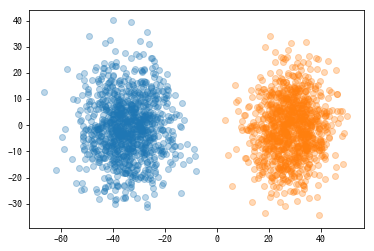

In [43]:
X_pca = X @ eig_vecs
print(X_pca.shape)

plt.scatter(X_pca[:N, 0], X_pca[:N, 1], alpha=0.3)
plt.scatter(X_pca[N:, 0], X_pca[N:, 1], alpha=0.3)
plt.show()

## Whitening(PCA+Standarize)

In [76]:
# X_pca_white = ((X_pca.T - np.mean(X_pca, axis=1)).T) / (np.sqrt(eig_vals) + 1e-8)
# X_pca_white =  (X - mu) @ eig_vecs
X_pca_white = (np.linalg.inv(np.sqrt(L)) @ ((X - mu) @ eig_vecs).T).T
print("E[X] =", np.mean(X_pca_white, axis=1))
print("Cov[X] =", X_pca_white @ X_pca_white.T)

E[X] = [ 0.05729334 -0.04969553 -0.06713229 ... -0.08546879  0.02572001
 -0.03570574]
Cov[X] = [[39.11340577  3.62429046 -0.53862199 ... -2.93788327 -1.04782298
  -1.83348038]
 [ 3.62429046 19.08294227 -0.66948105 ... -2.89013197  1.43123215
  -1.58335222]
 [-0.53862199 -0.66948105 28.10198334 ...  4.10814808 -1.78661148
  -0.89508882]
 ...
 [-2.93788327 -2.89013197  4.10814808 ... 17.86641684  4.60306039
   2.30191271]
 [-1.04782298  1.43123215 -1.78661148 ...  4.60306039 26.12885707
  -3.97222373]
 [-1.83348038 -1.58335222 -0.89508882 ...  2.30191271 -3.97222373
  26.52320316]]


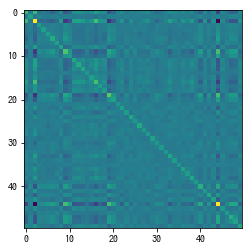

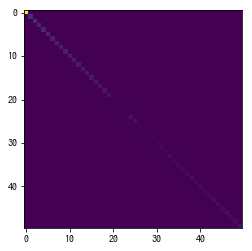

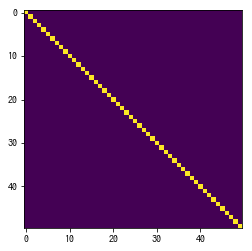

In [77]:
plt.imshow(np.cov(X, rowvar=False))
plt.show()

plt.imshow(np.cov(X_pca, rowvar=False))
plt.show()

plt.imshow(np.cov(X_pca_white, rowvar=False))
plt.show()

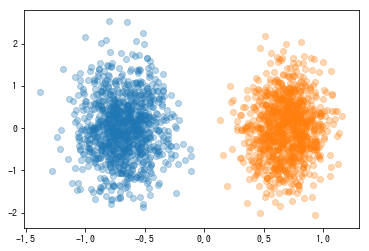

In [79]:
plt.scatter(X_pca_white[:N, 0], X_pca_white[:N, 1], alpha=0.3)
plt.scatter(X_pca_white[N:, 0], X_pca_white[N:, 1], alpha=0.3)
plt.show()

## 4-dim cumulant

[-9.62268284e-06  1.41654015e+00  2.18897164e+00]


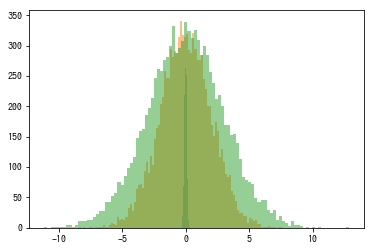

In [116]:
def kurtosis(X):
    return np.mean(X**4, axis=0) - 3 * np.mean(X**2, axis=0)**2

v1 = np.random.normal(0, 0.1, 10000)
v2 = np.random.normal(0, 2, 10000)
v3 = np.random.normal(0, 3, 10000)
plt.hist(v1, bins=100, alpha=0.5)
plt.hist(v2, bins=100, alpha=0.5)
plt.hist(v3, bins=100, alpha=0.5)
print(kurtosis(np.c_[v1, v2, v3]))
plt.show()